In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras

In [2]:
(train_input,train_target),(test_input,test_target)=imdb.load_data(num_words=500)
train_input,val_input,train_target,val_target=train_test_split(train_input,train_target,test_size=0.2,random_state=42)
train_seq=pad_sequences(train_input,maxlen=100)
val_seq=pad_sequences(val_input,maxlen=100)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
model2=keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.LSTM(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [4]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-lstm-model.h5',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history=model2.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 10ms/step - loss: 0.6922 - accuracy: 0.5506 - val_loss: 0.6911 - val_accuracy: 0.5928
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6890 - accuracy: 0.6076 - val_loss: 0.6868 - val_accuracy: 0.6346
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6811 - accuracy: 0.6484 - val_loss: 0.6744 - val_accuracy: 0.6530
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6428 - accuracy: 0.6584 - val_loss: 0.6095 - val_accuracy: 0.7160
Epoch 5/100
313/313 [==============================] - 3s 11ms/step - loss: 0.5839 - accuracy: 0.7380 - val_loss: 0.5722 - val_accuracy: 0.7436
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5572 - accuracy: 0.7566 - val_loss: 0.5499 - val_accuracy: 0.7534
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5367 - accuracy: 0.7638 - val_loss: 0.5312 - val_accuracy: 0.7

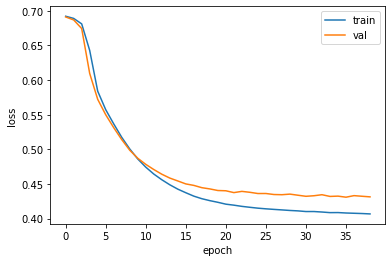

In [5]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [7]:
model3=keras.Sequential()
model3.add(keras.layers.Embedding(500,16,input_length=100))
model3.add(keras.layers.LSTM(8,dropout=0.3))
model3.add(keras.layers.Dense(1,activation='sigmoid'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 8)                 800       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [8]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-dropout-model.h5',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history=model3.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 10ms/step - loss: 0.6925 - accuracy: 0.5304 - val_loss: 0.6921 - val_accuracy: 0.5572
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6907 - accuracy: 0.5651 - val_loss: 0.6893 - val_accuracy: 0.6104
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6840 - accuracy: 0.6018 - val_loss: 0.6741 - val_accuracy: 0.5630
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6394 - accuracy: 0.6543 - val_loss: 0.6167 - val_accuracy: 0.7282
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6031 - accuracy: 0.7367 - val_loss: 0.5955 - val_accuracy: 0.7442
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5852 - accuracy: 0.7500 - val_loss: 0.5801 - val_accuracy: 0.7534
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5694 - accuracy: 0.7582 - val_loss: 0.5643 - val_accuracy: 0.762

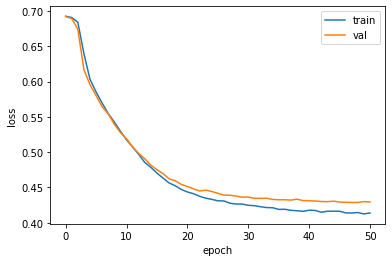

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()